# Mathematical Optimization: Examples of Finding the Minima of Functions


https://scipy-lectures.org/advanced/mathematical_optimization/

In [19]:
from scipy import optimize
import numpy as np

## 1D Optimization:

In [22]:
def f(x):
    return -np.exp(-(x - 0.7)**4)

In [23]:
result = optimize.minimize_scalar(f)

In [24]:
result.success

True

In [25]:
result.x

0.6999960520307124

In [26]:
result

     fun: -1.0
    nfev: 25
     nit: 21
 success: True
       x: 0.6999960520307124

## Brent's Method:

Converged at  6
Converged at  23


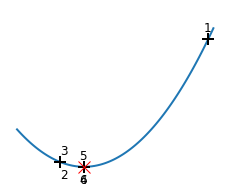

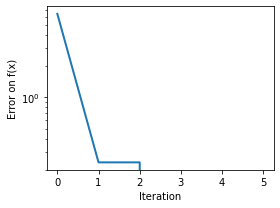

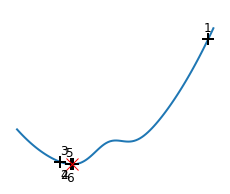

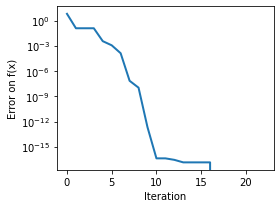

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

for epsilon in (0, 1):
    plt.figure(figsize=(3, 2.5))
    plt.axes([0, 0, 1, 1])

    # A convex function
    plt.plot(x, f(x), linewidth=2)

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            print('Converged at ', iter)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            plt.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)

    plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)

    plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
    plt.axis('off')
    plt.ylim(ymin=-1, ymax=8)

    plt.figure(figsize=(4, 3))
    plt.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    plt.ylabel('Error on f(x)')
    plt.xlabel('Iteration')
    plt.tight_layout()

plt.show()

## Conjugated Gradients:

In [28]:
def f(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [31]:
result = optimize.minimize(f, [2, -1], method="CG")
result

     fun: 1.6503729082243953e-11
     jac: array([-6.15347610e-06,  2.53804028e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999426, 0.99998863])